## PR Video

In [25]:
import h5py
import os
import pandas as pd
import numpy as np
import copy
import scipy

folder_path = 'Raw_Time_Series_Data'
hdf5_file_path = os.path.join(folder_path, 'tracking_data.h5')

# Open the HDF5 file
with h5py.File(hdf5_file_path, 'r') as file:
    # Access the dataset
    dataset = file['tracking_data']

    # Read and print the entire dataset
    data = dataset[:]

df = pd.DataFrame(data, columns = ['Data', 'Hour', 'Minute', 'Seconds', 'Microseconds', 'Time Norm', 'Track_ID', 'Object Class', 'X', 'Y', 'Temp', 'Humidity', 'Rain', 'Showers', 'Snowfall', 'Cloud  Cover'])

In [26]:
df

Data  Hour  Minute  Seconds  Microseconds  Time Norm  Track_ID  \
0     20240118.0   0.0     1.0     26.0      645384.0   0.001003       1.0   
1     20240118.0   0.0     1.0     26.0      645384.0   0.001003       2.0   
2     20240118.0   0.0     1.0     26.0      645384.0   0.001003       3.0   
3     20240118.0   0.0     1.0     26.0      645384.0   0.001003       4.0   
4     20240118.0   0.0     1.0     26.0      645384.0   0.001003       5.0   
...          ...   ...     ...      ...           ...        ...       ...   
6110  20240118.0   0.0     2.0     36.0      989683.0   0.001817      13.0   
6111  20240118.0   0.0     2.0     36.0      989683.0   0.001817      14.0   
6112  20240118.0   0.0     2.0     36.0      989683.0   0.001817      15.0   
6113  20240118.0   0.0     2.0     36.0      989683.0   0.001817      16.0   
6114  20240118.0   0.0     2.0     36.0      989683.0   0.001817      18.0   

      Object Class            X            Y  Temp  Humidity  Rain  Showers  \
0              0.0  2003.657959   415.593262  -3.5      85.0   0.0      0.0   
1              0.0   671.989258   466.078033  -3.5      85.0   0.0      0.0   
2              3.0  3055.343750  1076.818604  -3.5      85.0   0.0      0.0   
3              3.0  3093.428223  1131.679443  -3.5      85.0   0.0      0.0   
4              2.0  3269.794189  1115.433594  -3.5      85.0   0.0      0.0   
...            ...          ...          ...   ...       ...   ...      ...   
6110           2.0  3499.916504  1302.041992  -3.5      85.0   0.0      0.0   
6111           1.0  1698.440674   484.363831  -3.5      85.0   0.0      0.0   
6112           2.0  3604.302734  1289.892578  -3.5      85.0   0.0      0.0   
6113           2.0  3478.060303  1236.326660  -3.5      85.0   0.0      0.0   
6114           1.0  1697.579834   707.867249  -3.5      85.0   0.0      0.0   

      Snowfall  Cloud  Cover  
0          0.0         100.0  
1          0.0         100.0  
2          0.0         100.0  
3          0.0         100.0  
4          0.0         100.0  
...        ...           ...  
6110       0.0         100.0  
6111       0.0         100.0  
6112       0.0         100.0  
6113       0.0         100.0  
6114       0.0         100.0  

[6115 rows x 16 columns]

In [2]:
aircraft = df[df['Track_ID']==8]
aircraft_x = aircraft['X'].to_numpy()
aircraft_y = aircraft['Y'].to_numpy()

fuel_truck = df[df['Track_ID']==12]
fuel_truck_x = fuel_truck['X'].to_numpy()
fuel_truck_y = fuel_truck['Y'].to_numpy()

tractor17 = df[df['Track_ID']==17]
tractor17_x = tractor17['X'].to_numpy()
tractor17_y = tractor17['Y'].to_numpy()

tractor18 = df[df['Track_ID']==18]
tractor18_x = tractor18['X'].to_numpy()
tractor18_y = tractor18['Y'].to_numpy()

tractor_x = np.concatenate([tractor17_x, tractor18_x], axis = 0)
tractor_y = np.concatenate([tractor17_y, tractor18_y], axis = 0)

time = aircraft['Hour'] + aircraft['Minute']/60.0 + aircraft['Seconds']/3600.0 + aircraft['Microseconds']/(3600.0 * 1000000)
time = time.to_numpy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


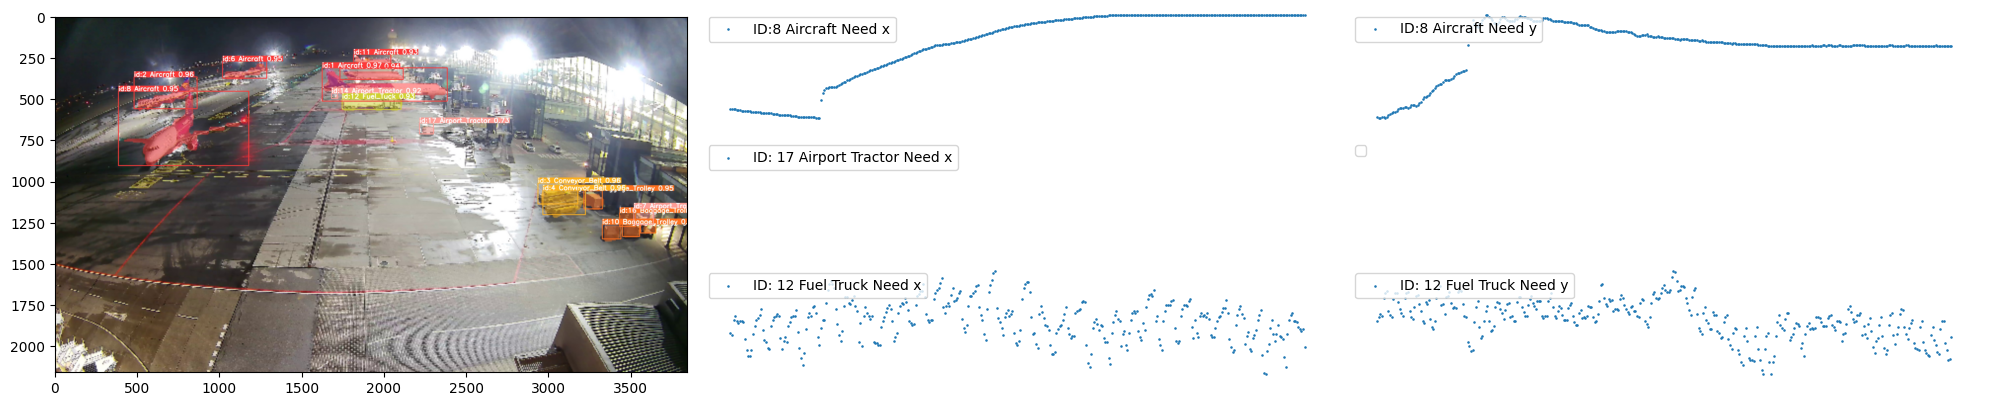

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('runs/segment/predict4/Gdansk_Live_Stream_6_frames/0.jpg')


## Plot for X-coordinates
plt.figure(figsize=(20,4))
plt.subplot(332)
plt.scatter(time, aircraft_x, label = 'ID:8 Aircraft Need x', s = 0.7)
plt.legend(loc = 'upper left')
plt.xticks([])
plt.axis('off')

plt.subplot(335)
plt.scatter(time[0:48], tractor_x[0:48], label = 'ID: 17 Airport Tractor Need x', s = 0.7)
plt.legend(loc = 'upper left')
plt.xlim([18.07944444, 18.09944444])
plt.xticks([])
plt.axis('off')

plt.subplot(338)
plt.scatter(time, fuel_truck_x, label = 'ID: 12 Fuel Truck Need x', s = 0.7)
plt.legend(loc = 'upper left')
plt.xticks([])
plt.axis('off')


## Plot for Y-coordinates
plt.subplot(333)
plt.scatter(time, aircraft_y, label = 'ID:8 Aircraft Need y', s = 0.7)
plt.legend(loc = 'upper left')
plt.xticks([])
plt.axis('off')

plt.subplot(336)
#plt.scatter(time, tractor_y, label = 'ID: 17 Airport Tractor Need y', s = 0.7)
plt.legend(loc = 'upper left')
plt.xticks([])
plt.axis('off')

plt.subplot(339)
plt.scatter(time, fuel_truck_y, label = 'ID: 12 Fuel Truck Need y', s = 0.7)
plt.legend(loc = 'upper left')
plt.xticks([])
plt.axis('off')


plt.subplot(131)
plt.imshow(img)

plt.tight_layout()
plt.show()

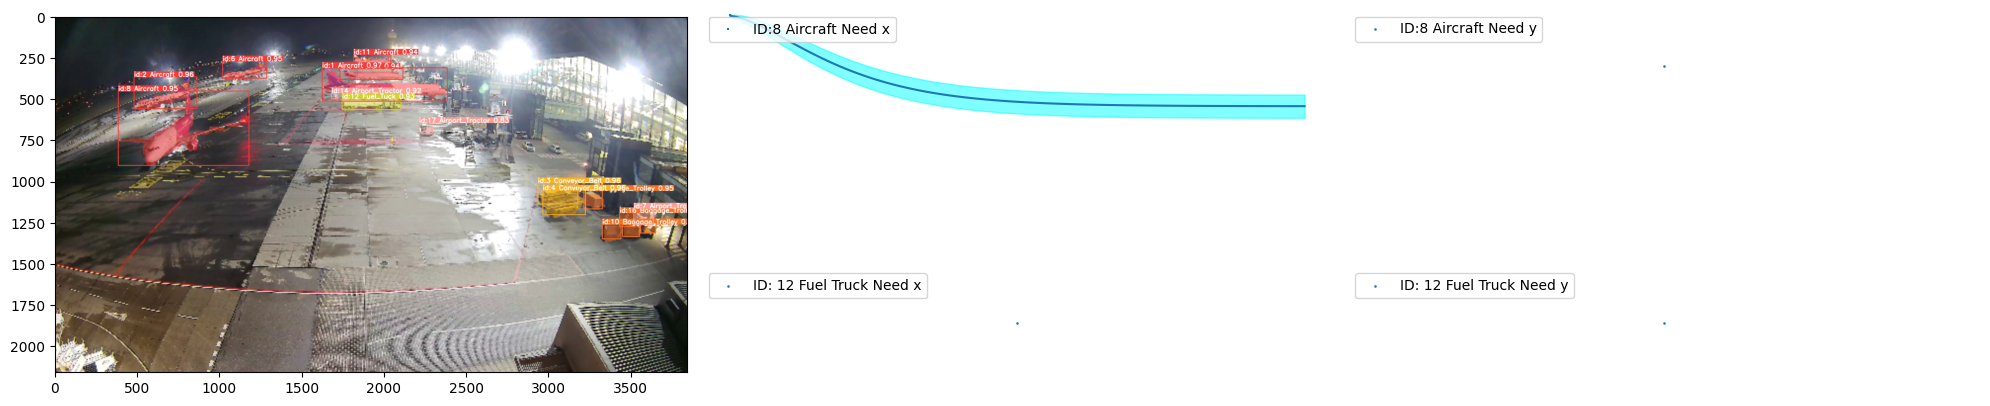

<Figure size 640x480 with 0 Axes>

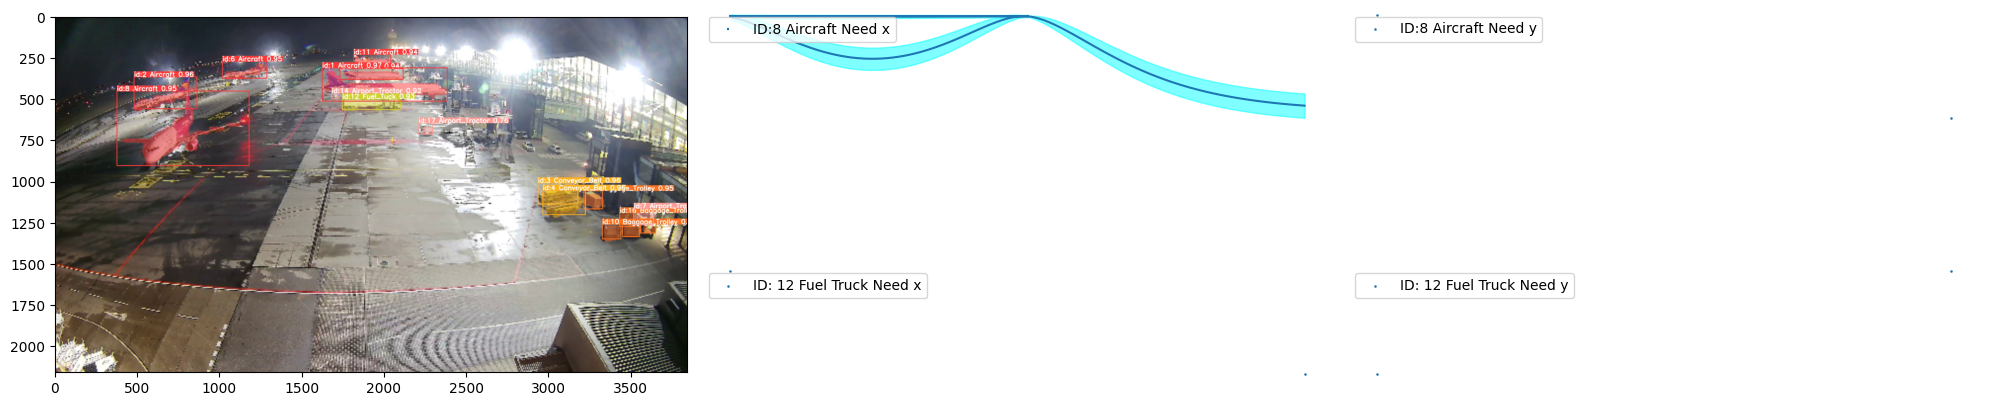

<Figure size 640x480 with 0 Axes>

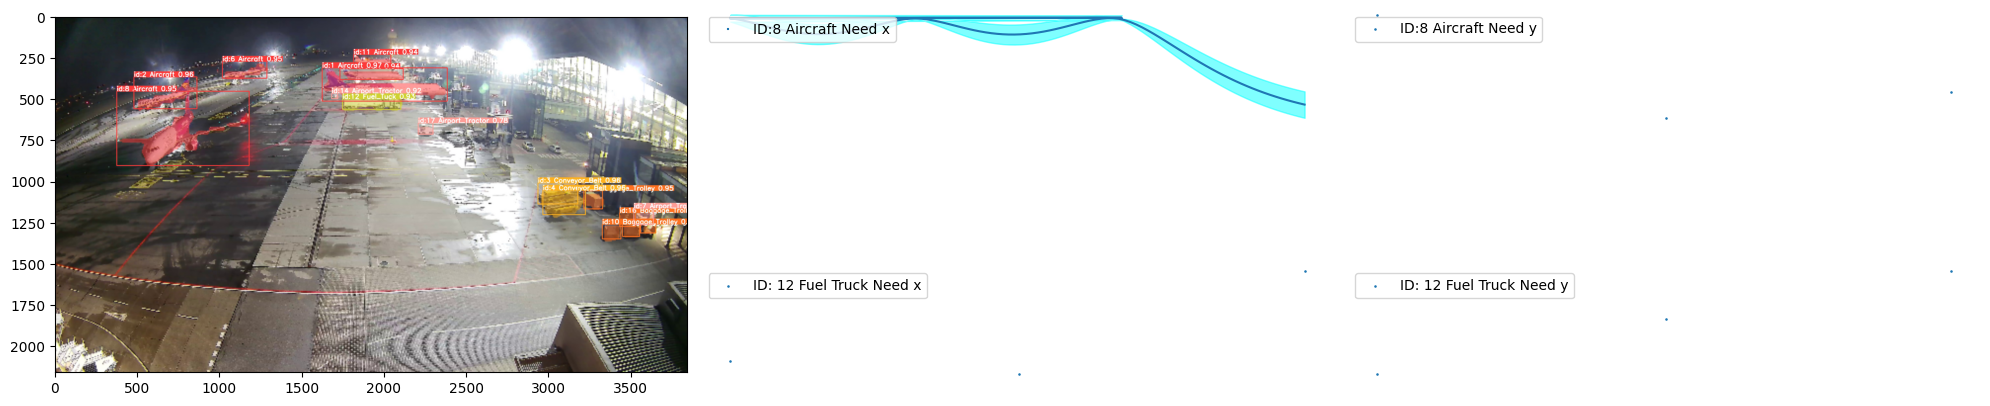

<Figure size 640x480 with 0 Axes>

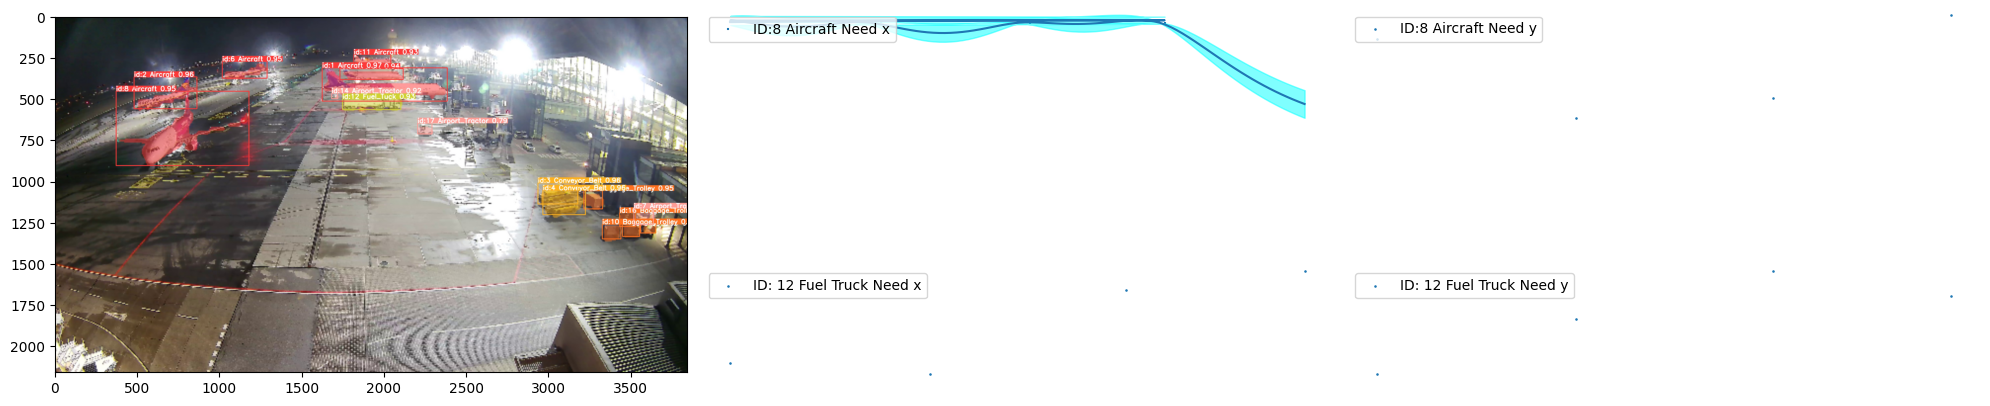

<Figure size 640x480 with 0 Axes>

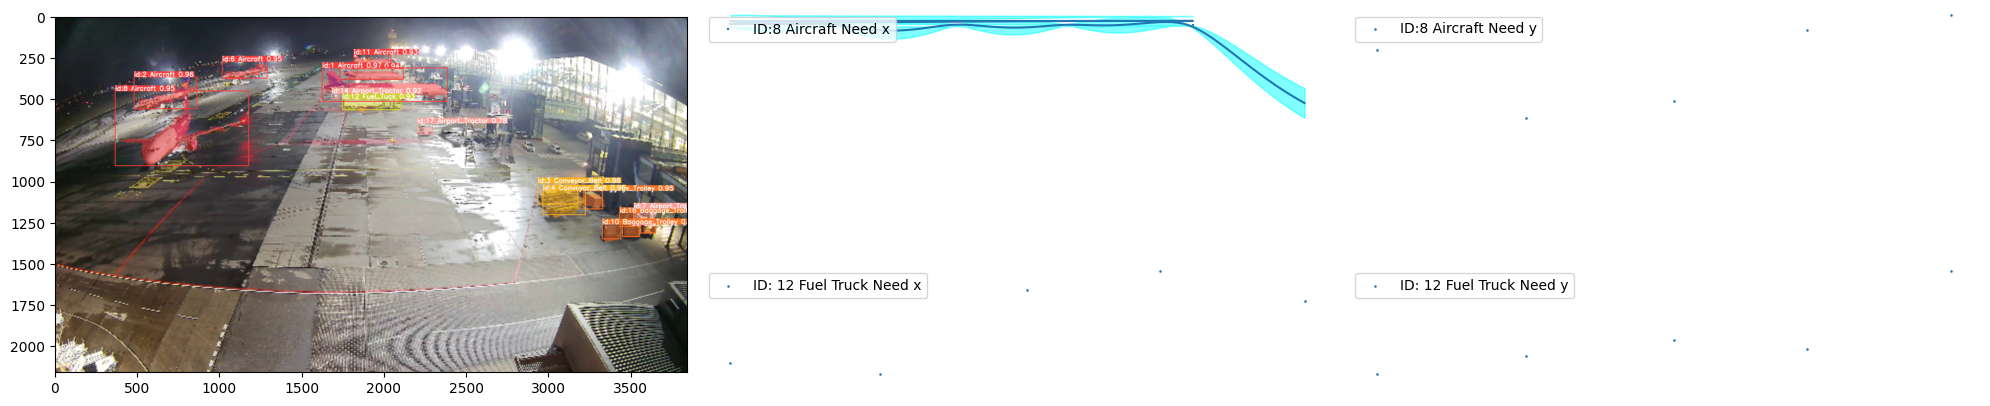

<Figure size 640x480 with 0 Axes>

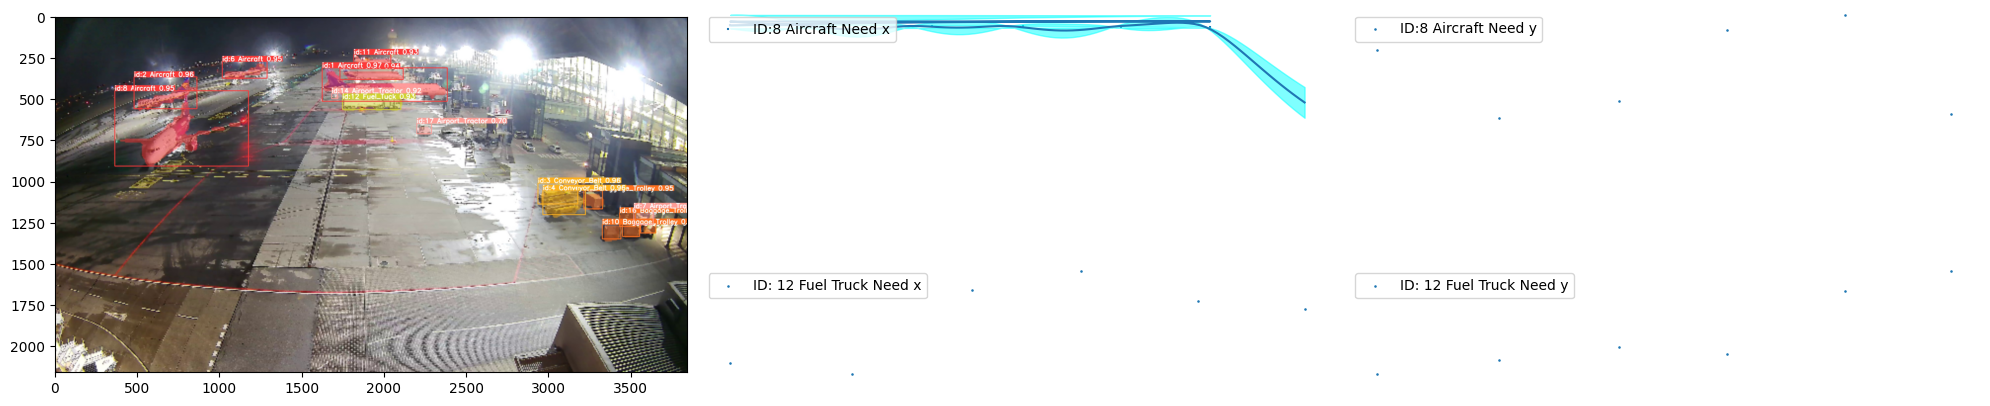

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

In [97]:
directory = 'runs/segment/predict4/Gdansk_Live_Stream_6_frames/'
path = os.listdir(directory)

sorted_frames = sorted(path, key=lambda x: int(x.split('.')[0]))

def get_coord(lists, array, index):
    lists.append(array[index])
    return lists

for i in range(len(time)):
    # Get i-th video frame
    img_path = os.path.join(directory, sorted_frames[i])
    frame = mpimg.imread(img_path)

    # get kalman-filter+smoothing results for each pairs of the results ----> get mean and variance for each X's and Y's
    if i == 0:
        pass
    else:
        to = time[0:i]
        max_forecast = 1
        dt = 5.4578888888887414e-05
        t1 = to[-1] + np.arange(1, max_forecast + 1) * dt
        t1 = np.linspace(to[0], t1[-1], 100)
        total_time = np.vstack([to.reshape(-1,1), t1.reshape(-1,1)])
        total_time = total_time.flatten()
        
        air_x = aircraft_x[0:i]
        air_y = aircraft_y[0:i]

        trac_x = tractor_x[0:i]
        trac_y = tractor_y[0:i]

        fuel_x = fuel_truck_x[0:i]
        fuel_y = fuel_truck_y[0:i]

        air_x_mean, air_x_var = filter(to, t1, air_x)
        air_y_mean, air_y_var = filter(to, t1, air_y)

        fuel_x_mean, fuel_x_var = filter(to, t1, fuel_x)
        fuel_y_mean, fuel_y_var = filter(to, t1, fuel_y)   


        ## Plot for X-coordinates
        plt.figure(figsize=(20,4))
        plt.subplot(332)
        plt.scatter(to, air_x, label = 'ID:8 Aircraft Need x', s = 0.7, marker = '+')
        plt.plot(total_time, air_x_mean)
        plt.fill_between(total_time, air_x_mean - np.sqrt(air_x_var), air_x_mean + np.sqrt(air_x_var), alpha = 0.5, color = 'aqua')
        plt.legend(loc = 'upper left')
        plt.xticks([])
        plt.axis('off')

        del total_time, air_x_mean, air_x_var

        plt.subplot(335)
        #plt.scatter(times, trac_x, label = 'ID: 17 Airport Tractor Need x', s = 0.7)
        #plt.legend(loc = 'upper left')
        #plt.xlim([18.07944444, 18.09944444])
        plt.xticks([])
        plt.axis('off')

        plt.subplot(338)
        plt.scatter(to, fuel_x, label = 'ID: 12 Fuel Truck Need x', s = 0.7)
        plt.legend(loc = 'upper left')
        plt.axis('off')



        ## Plot for Y-coordinates
        plt.subplot(333)
        plt.scatter(to, air_y, label = 'ID:8 Aircraft Need y', s = 0.7)
        plt.legend(loc = 'upper left')
        plt.xticks([])
        plt.axis('off')

        plt.subplot(336)
        #plt.scatter(time, tractor_y, label = 'ID: 17 Airport Tractor Need y', s = 0.7)
        #plt.legend(loc = 'upper left')
        plt.xticks([])
        plt.axis('off')

        plt.subplot(339)
        plt.scatter(to, fuel_y, label = 'ID: 12 Fuel Truck Need y', s = 0.7)
        plt.legend(loc = 'upper left')
        plt.axis('off')


        plt.subplot(131)
        plt.imshow(frame)

        plt.tight_layout()
        plt.show()
        plt.clf()
        #plt.savefig(f'frame_{i}.png')

In [3]:
i = 5
to = time[0:i]
max_forecast = 1
dt = 5.4578888888887414e-05
t1 = to[-1] + np.arange(1, max_forecast + 1) * dt
t1 = np.linspace(to[0], t1[-1], 100)
total_time = np.vstack([to.reshape(-1,1), t1.reshape(-1,1)])
total_time = total_time.flatten()

air_x = aircraft_x[0:i]
air_y = aircraft_y[0:i]

trac_x = tractor_x[0:i]
trac_y = tractor_y[0:i]

fuel_x = fuel_truck_x[0:i]
fuel_y = fuel_truck_y[0:i]

air_x_mean, air_x_var = filter(to, t1, air_x)
air_y_mean, air_y_var = filter(to, t1, air_y)

fuel_x_mean, fuel_x_var = filter(to, t1, fuel_x)
fuel_y_mean, fuel_y_var = filter(to, t1, fuel_y)   


## Plot for X-coordinates
plt.figure(figsize=(20,4))
plt.subplot(332)
plt.scatter(to, air_x, label = 'ID:8 Aircraft Need x', s = 0.7, marker = '+')
plt.plot(total_time, air_x_mean)
plt.fill_between(total_time, air_x_mean - np.sqrt(air_x_var), air_x_mean + np.sqrt(air_x_var), alpha = 0.5, color = 'aqua')
#plt.legend(loc = 'upper left')
plt.xticks([])
plt.axis('off')
plt.show()
plt.clf()

TypeError: filter expected 2 arguments, got 3

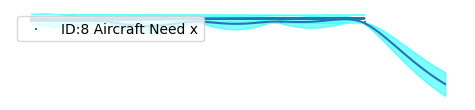

In [17]:
import matplotlib.pyplot as plt

i = 5
to = time[0:i]
max_forecast = 1
dt = 5.4578888888887414e-05
t1 = to[-1] + np.arange(1, max_forecast + 1) * dt
t1 = np.linspace(to[0], t1[-1], 100)
total_time = np.vstack([to.reshape(-1,1), t1.reshape(-1,1)])
total_time = total_time.flatten()

air_x = aircraft_x[0:i]
air_y = aircraft_y[0:i]

trac_x = tractor_x[0:i]
trac_y = tractor_y[0:i]

fuel_x = fuel_truck_x[0:i]
fuel_y = fuel_truck_y[0:i]

air_x_mean, air_x_var = filter(to, t1, air_x)
air_y_mean, air_y_var = filter(to, t1, air_y)

fuel_x_mean, fuel_x_var = filter(to, t1, fuel_x)
fuel_y_mean, fuel_y_var = filter(to, t1, fuel_y)   


## Plot for X-coordinates
plt.figure(figsize=(20,4))
plt.subplot(332)
plt.scatter(to, air_x, label = 'ID:8 Aircraft Need x', s = 0.7, marker = '+')
plt.plot(total_time, air_x_mean)
plt.fill_between(total_time, air_x_mean - np.sqrt(air_x_var), air_x_mean + np.sqrt(air_x_var), alpha = 0.5, color = 'aqua')
plt.legend(loc = 'upper left')
plt.xticks([])
plt.axis('off')
plt.show()

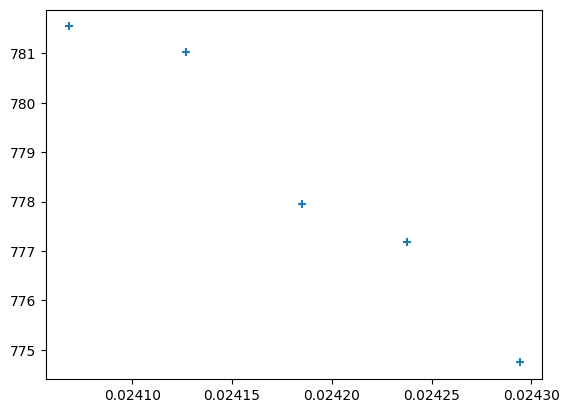

In [21]:
plt.scatter(to, air_x, label = 'ID:8 Aircraft Need x', marker = '+')

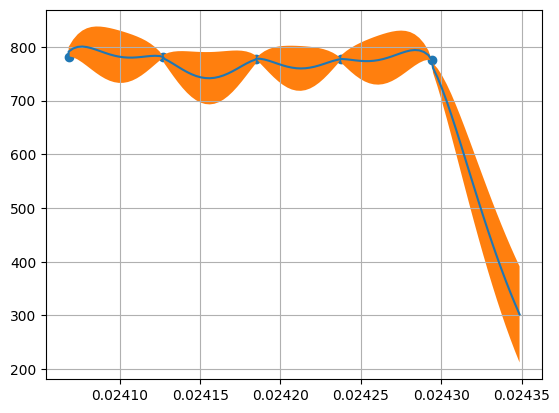

In [54]:
import matplotlib.pyplot as plt
plt.scatter(time[0:5], aircraft_x[0:5])
plt.plot(total_time, m_s)
plt.fill_between(total_time.flatten(), m_s.flatten() - np.sqrt(var_new), m_s.flatten() + np.sqrt(var_new))
plt.plot()
plt.grid()
plt.show()

In [8]:
def filter(to, t1, yo):
    total_time = np.vstack([to.reshape(-1,1), t1.reshape(-1,1)])
    indices = np.argsort(total_time.flatten(), axis = -1)
    total_time = total_time[indices]
    TT = total_time.shape[0]


    # Define the LTI SDE model: Matern 3/2
    ell = 0.001
    lambda_ = np.sqrt(3) / ell
    mag_sigma_2 = 100.0**2       # Magnitude of state covariance, can also tune this 
    sigma_2 = 0.1 ** 2      # Observation noise

    F = np.array([[0, 1], [-lambda_**2, -2 * lambda_]])
    L = np.array([0, 1]).reshape(2,1)
    Q = 4 * lambda_**3 * mag_sigma_2     # Process Noise
    H = np.array([1, 0]).reshape(1,2)
    Pinf = mag_sigma_2 * np.diag([1, lambda_**2])  # State Covariance


    # Initialize
    m = np.zeros((F.shape[0], 1))
    #m = np.array([780.0, 0]).reshape(2,-1)
    P = copy.deepcopy(Pinf)

    # Plae holders
    MF = np.zeros((F.shape[0], TT))                # Predicted Filter Mean
    PF = np.zeros((F.shape[0], F.shape[1], TT))    # Predictd Filter Covariance
    MP = np.zeros((F.shape[0], TT))                # Updated Filter Mean
    PP = np.zeros((F.shape[0], F.shape[1], TT))    # Updated Filter Covariance
    GS = np.zeros((F.shape[0], F.shape[1], TT))    # Smoother Gain

    doupdate = indices < len(to)        # Perform state update on test points

    for k in range(0, TT):
        if k == 0:
            dt = 5.4578888888887414e-05
            #dt = 0.1
        else:
            dt = 5.4578888888887414e-05
            #dt = 0.1
        
        # Solve the LTI Stochastic Differential Equation
        A = scipy.linalg.expm(F * dt)
        Q = Pinf - A @ Pinf @ A.T

        # kalman prediciton
        mp = A @ m
        Pp = A @ P @ A.T + Q

        # Pre-calculate smoother gain
        # Gs = (P @ A.T) @ np.linalg.inv(Pp)
        Gs = np.linalg.lstsq(Pp.T, (P @ A.T).T, rcond = None)[0].T

        # Kalman Update
        if doupdate[k]:
            #yo = aircraft_x[0]
            v = (yo[indices[k]] - H @ m).astype(np.float32)
            S = H @ P @ H.T + sigma_2
            #K = (Pp @ H.T)/S
            K = np.linalg.lstsq(S.T, (P @ H.T).T, rcond = None)[0].T
            m += K * v
            P -= K @ H @ P
        else:
            m = mp
            P = Pp

        MF[:, k] = m.T
        PF[:, :, k] = P
        MP[:, k] = mp.T
        PP[:, :, k] = Pp
        GS[:, :, k] = Gs

    # Run RTS smoother
    MS = copy.deepcopy(MF)
    PS = copy.deepcopy(PF)
    ms = MS[:, -1]
    Ps = PS[:,:,-1]


    for j in range(TT-2, -1, -1):
        ms = MF[:, j] + GS[:, :, j+1] @ (ms - MP[:, j+1])
        Ps = PF[:,:,j] + GS[:,:,j+1] @ (Ps - PP[:,:,j+1]) @ (GS[:,:,j+1]).T
        MS[:,j] = ms
        PS[:,:,j] = Ps
    
    m_s = (H @ MS).T 

    var_s = []

    for i in range(PS.shape[2]):
        var_s.append(H @ PS[:,:,i] @ H.T)
    
    var_s = np.array(var_s).flatten()

    return m_s.flatten(), var_s